# Integrated Taxonomic Information System (ITIS) - 26-Feb-2021

- [Database dumps](https://www.itis.gov/downloads/index.html)
- [Web services](https://www.itis.gov/web_service.html)

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("data/ITIS.sqlite")

In [3]:
pd.read_sql_query("SELECT kingdom_id, kingdom_name from kingdoms WHERE kingdom_name = (?)", con, 
                  params=('Plantae',))

,kingdom_id,kingdom_name
0,3,Plantae


In [93]:
df_taxon_unit_types = pd.read_sql_query("""SELECT * from taxon_unit_types 
                                           WHERE kingdom_id = (?) 
                                           ORDER BY rank_id ASC""", 
                                        con, params=(3,))
df_taxon_unit_types

,kingdom_id,rank_id,rank_name,dir_parent_rank_id,req_parent_rank_id,update_date
0,3,10,Kingdom,10,10,1996-06-13
1,3,20,Subkingdom,10,10,1996-06-13
2,3,25,Infrakingdom,20,10,2012-03-19
3,3,27,Superdivision,25,10,2014-08-20
4,3,30,Division,27,10,2014-08-20
5,3,40,Subdivision,30,30,1996-06-13
6,3,45,Infradivision,40,30,2012-03-19
7,3,50,Superclass,45,30,2012-03-19
8,3,60,Class,50,30,2012-03-19
9,3,70,Subclass,60,60,1996-06-13


In [89]:
taxonomy_group_ranges = {
    (10, 27): ('Kingdom', 10),
    (27, 50): ('Division', 30),
    (50, 90): ('Class', 60),
    (90, 140): ('Order', 100),
    (140, 160): ('Family', 140),
    (160, 180): ('Tribe', 160),
    (180, 200): ('Genus', 180),
    (200, 220): ('Section', 200),
    (220, 240): ('Species', 220),
    (240, 260): ('Variety', 240),
    (260, 271): ('Form', 260),
}

In [94]:
df_taxon_unit_groups = df_taxon_unit_types.rank_id.map(lambda rank_id: [value[1] for ((min_, max_), value) in taxonomy_group_ranges.items() if (rank_id >= min_ and rank_id < max_)][0])
df_taxon_unit_groups.name = 'rank_group'
df_taxon_unit_types = df_taxon_unit_types.join(df_taxon_unit_groups)
df_taxon_unit_types

,kingdom_id,rank_id,rank_name,dir_parent_rank_id,req_parent_rank_id,update_date,rank_group
0,3,10,Kingdom,10,10,1996-06-13,10
1,3,20,Subkingdom,10,10,1996-06-13,10
2,3,25,Infrakingdom,20,10,2012-03-19,10
3,3,27,Superdivision,25,10,2014-08-20,30
4,3,30,Division,27,10,2014-08-20,30
5,3,40,Subdivision,30,30,1996-06-13,30
6,3,45,Infradivision,40,30,2012-03-19,30
7,3,50,Superclass,45,30,2012-03-19,60
8,3,60,Class,50,30,2012-03-19,60
9,3,70,Subclass,60,60,1996-06-13,60


In [6]:
import graphviz

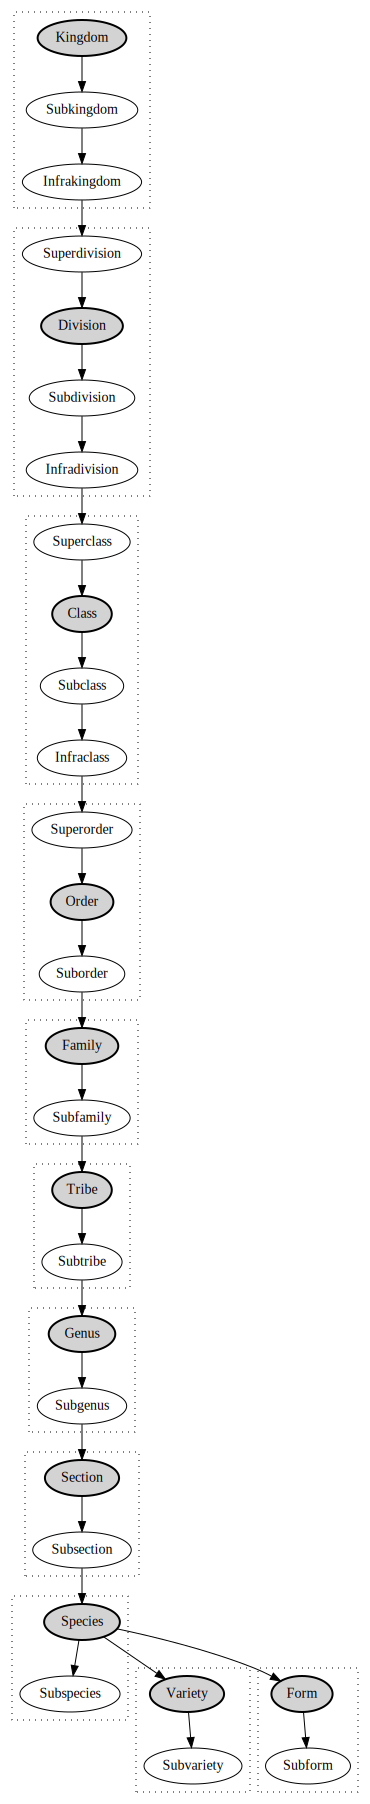

In [257]:
d = graphviz.Digraph('Taxonomy')
d.attr(rankdir='TB')

groups = {}

for row_id, row in df_taxon_unit_types.iterrows():
    if row.rank_group not in groups:
        rank_group_row = df_taxon_unit_types[df_taxon_unit_types.rank_id == row.rank_group].iloc[0]
        groups[row.rank_group] = graphviz.Digraph(f'cluster_{rank_group_row.rank_name}')
        groups[row.rank_group].attr(style='dotted')
    
    s = groups[row.rank_group]
    s.node(row.rank_name, style='bold,filled' if row.rank_id == row.rank_group else '')
    
    if row.dir_parent_rank_id == row.rank_id:
        continue
    
    dir_parent_row = df_taxon_unit_types[df_taxon_unit_types.rank_id == row.dir_parent_rank_id].iloc[0]
    s.edge(dir_parent_row.rank_name, row.rank_name)

for group_id, graph in groups.items():
    d.subgraph(graph)
    
d

To get a starting point into the hierarchy of entries, we need to find the TSN for the kingdom. We can look this up from the `longnames` table by specifying the name `Plantae`:

In [138]:
df_complete_names = pd.read_sql_query("SELECT * from longnames", con)
df_complete_names[df_complete_names.completename == 'Plantae']

,tsn,completename
202345,202422,Plantae


The hierarchy dataset gives us relations between TSN. For TSN `202422` (Plantae) we also find that there is no "parent" TSN, and that the level is `0`, indicating a root node:

In [140]:
df_hierarchy = pd.read_sql_query("SELECT * from hierarchy", con)
df_hierarchy[df_hierarchy.TSN == 202422]

,hierarchy_string,TSN,Parent_TSN,level,ChildrenCount
0,202422,202422,0,0,165892


Finding all entries with the parent TSN of `202422` we find `846491`(Biliphyta) and `954898`(Viridiplantae):

In [141]:
df_hierarchy[df_hierarchy.Parent_TSN == 202422]

,hierarchy_string,TSN,Parent_TSN,level,ChildrenCount
1,202422-846491,846491,202422,1,2666
2295,202422-954898,954898,202422,1,163222


In [163]:
df_complete_names[df_complete_names.tsn.isin([846491, 954898])]

,tsn,completename
556620,846491,Biliphyta
665027,954898,Viridiplantae


Vernaculars are _common names_ for entries. Note that not all TSN have vernacular names (e.g. `846491`, algae):

In [164]:
df_vernaculars = pd.read_sql_query("SELECT * from vernaculars", con)
df_vernaculars[df_vernaculars.tsn.isin([846491, 954898])]

,tsn,vernacular_name,language,approved_ind,update_date,vern_id
126130,954898,green plants,English,N,2018-09-25,167904


Note also that for some TSN we may also have _multiple_ vernacular names:

In [157]:
df_vernaculars[df_vernaculars.tsn == 50]

,tsn,vernacular_name,language,approved_ind,update_date,vern_id
0,50,bactéries,French,N,2015-03-02,159941
1,50,bacteria,English,N,2015-03-02,159942
2,50,bacterias,Spanish,N,2015-03-02,159943
3,50,bactérias,Portuguese,N,2015-03-02,159944


The `taxonomic_units` table gives a little bit more insight into the relations. We find (again) that the parent TSN of both `846491` and `954898` is `202422` (Plantae), that the taxonomic rank of both entries is `20` (subkingdom), and that the [taxonomic status](https://www.itis.gov/glossary.html#taxstatus) (`n_usage`) is `accepted` (vs. `not accepted`):

In [226]:
df_taxonomic_units = pd.read_sql_query("SELECT * from taxonomic_units WHERE kingdom_id = (?)", con,
                                      params = (3,))
df_taxonomic_units[df_taxonomic_units.tsn.isin([846491, 954898])]

,tsn,unit_ind1,unit_name1,unit_ind2,unit_name2,unit_ind3,unit_name3,unit_ind4,unit_name4,unnamed_taxon_ind,...,initial_time_stamp,parent_tsn,taxon_author_id,hybrid_author_id,kingdom_id,rank_id,update_date,uncertain_prnt_ind,n_usage,complete_name
2,846491,None,Biliphyta,None,None,None,None,None,None,N,...,2012-03-29 09:35:26,202422.0,0,0,3,20,2014-12-22,No,accepted,Biliphyta
4,954898,None,Viridiplantae,None,None,None,None,None,None,N,...,2014-12-22 14:36:34,202422.0,0,0,3,20,2018-09-25,No,accepted,Viridiplantae


In [228]:
df_taxonomic_units[df_taxonomic_units.tsn.isin([503872, 506762, 
                                                502333, 521112])]

,tsn,unit_ind1,unit_name1,unit_ind2,unit_name2,unit_ind3,unit_name3,unit_ind4,unit_name4,unnamed_taxon_ind,...,initial_time_stamp,parent_tsn,taxon_author_id,hybrid_author_id,kingdom_id,rank_id,update_date,uncertain_prnt_ind,n_usage,complete_name
42835,502333,None,Epipremnum,None,pinnatum,None,None,None,None,N,...,1996-11-04 17:57:08,500265.0,46787,0,3,220,2011-03-22,No,accepted,Epipremnum pinnatum
44374,503872,None,Monstera,None,deliciosa,None,None,None,None,N,...,1996-11-04 17:57:08,500426.0,41479,0,3,220,2011-03-22,No,accepted,Monstera deliciosa
47264,506762,None,Monstera,None,adansonii,None,None,None,None,N,...,1996-11-04 17:57:08,500426.0,42941,0,3,220,2011-03-22,No,accepted,Monstera adansonii
61611,521112,None,Scindapsus,None,aureus,None,None,None,None,None,...,1996-11-04 17:57:08,0.0,140631,0,3,220,2011-03-22,No,not accepted,Scindapsus aureus


Note here that the TSN `521112` (Scindapsus aureus) does not have an accepted name and that the `unaccept_reason` column indicates that the name is a synonym for _something else_:

In [229]:
df_taxonomic_units[df_taxonomic_units.tsn == 521112].transpose()

,61611
tsn,521112
unit_ind1,None
unit_name1,Scindapsus
unit_ind2,None
unit_name2,aureus
unit_ind3,None
unit_name3,None
unit_ind4,None
unit_name4,None
unnamed_taxon_ind,None


The `synonym_links` table shows that for TSN `521112` we have the accepted TSN `502333`, which is the _Epipremnum pinnatum_ shown in the table above.

In [230]:
df_synonym_links = pd.read_sql_query("SELECT * from synonym_links", con)
df_synonym_links[df_synonym_links.tsn == 521112]

,tsn,tsn_accepted,update_date
70274,521112,502333,1996-11-05


According to the documentation, reasons for rejection in the _Plantae_ kingdom are:

- database artifact
- homonym (illegitimate)
- horticultural
- invalidly published, nomen nudum
- invalidly published, other
- misapplied
- orthographic variant (misspelling)
- other, see comments
- pro parte
- rejected name
- superfluous renaming (illegitimate)
- synonym
- unspecified in provided data

The following summary shows the actutal value distribution:

In [231]:
df_taxonomic_units.groupby(by='unaccept_reason')['unaccept_reason'].count().sort_values(ascending=False)

unaccept_reason
synonym                                61219
other, see comments                    22504
database artifact                       1940
orthographic variant (misspelling)      1770
superfluous renaming (illegitimate)      630
misapplied                               601
invalidly published, nomen nudum         550
invalidly published, other               444
homonym (illegitimate)                   430
pro parte                                 86
rejected name                             55
horticultural                             16
Name: unaccept_reason, dtype: int64

For TSN `894311` we get "_Ceropegia somalensis_ f. _somalensis_" which is rejected with the reason `other, see comments`.

In [240]:
df_taxonomic_units[df_taxonomic_units.tsn == 894311].transpose()

,165726
tsn,894311
unit_ind1,None
unit_name1,Ceropegia
unit_ind2,None
unit_name2,somalensis
unit_ind3,f.
unit_name3,somalensis
unit_ind4,None
unit_name4,None
unnamed_taxon_ind,N


Looking up the comment, we find the detail "obsolete autonym" (indicating that "somalensis f. somalensis" is a problem):

In [247]:
pd.read_sql_query("""
    SELECT comments.* 
    FROM 
        comments, 
        tu_comments_links 
    WHERE 
        tu_comments_links.tsn = (?) 
    AND comments.comment_id = tu_comments_links.comment_id
    """, con, params=(894311,)).transpose()

,0
comment_id,21842
commentator,"S.N. Alexander, ITIS Data Development Specialist"
comment_detail,obsolete autonym
comment_time_stamp,2011-06-29 08:41:44
update_date,2017-04-25


Looking up any synonyms, we find that _Ceropegia somalensis_ is the accepted name.

In [249]:
pd.read_sql_query("""
    SELECT taxonomic_units.* 
    FROM 
        taxonomic_units, 
        synonym_links 
    WHERE 
        synonym_links.tsn = (?) 
    AND taxonomic_units.tsn = synonym_links.tsn_accepted
    """, con, params=(894311,)).transpose()

,0
tsn,894060
unit_ind1,None
unit_name1,Ceropegia
unit_ind2,None
unit_name2,somalensis
unit_ind3,None
unit_name3,None
unit_ind4,None
unit_name4,None
unnamed_taxon_ind,N


Conversely we find that for TSN `894060` (Ceropegia somalensis) there are two synonyms pointing to it:

In [252]:
pd.read_sql_query("""
    SELECT taxonomic_units.* 
    FROM 
        taxonomic_units, 
        synonym_links 
    WHERE 
        synonym_links.tsn_accepted = (?) 
    AND taxonomic_units.tsn = synonym_links.tsn
    """, con, params=(894060,)).transpose()

,0,1
tsn,894310,894311
unit_ind1,None,None
unit_name1,Ceropegia,Ceropegia
unit_ind2,None,None
unit_name2,somalensis,somalensis
unit_ind3,f.,f.
unit_name3,erostrata,somalensis
unit_ind4,None,None
unit_name4,None,None
unnamed_taxon_ind,N,N


Lastly, here is the distribution of `accepted` vs. `not accepted`:

In [232]:
df_taxonomic_units.groupby(by='name_usage')['name_usage'].count().sort_values(ascending=False)

name_usage
not accepted    90245
accepted        75642
Name: name_usage, dtype: int64

To get the authors for each taxon, we can look up the `taxon_author_id` referenced in the `taxonomic_units` table within the `taxon_authors_lkp` table. For _Ceropegia somalensis_ above this gives _Ceropegia somalensis Chiov._

In [254]:
df_taxon_authors = pd.read_sql_query("SELECT * from taxon_authors_lkp WHERE kingdom_id = (?)", con,
                                      params = (3,))
df_taxon_authors[df_taxon_authors.taxon_author_id == 76184]

,taxon_author_id,taxon_author,update_date,kingdom_id,short_author
22311,76184,Chiov.,2000-03-15,3,Chiov


# Transferring to Dgraph

After starting Dgraph using `docker-compose up`, you can open up the Ratel frontend at http://localhost:8000.

In [350]:
import pydgraph

client_stub = pydgraph.DgraphClientStub('localhost:9080')
client = pydgraph.DgraphClient(client_stub)

In [304]:
# client.login('groot', 'password')

To get into a clean state, we can now drop all data including schema from the Dgraph instance.

In [351]:
op = pydgraph.Operation(drop_all=True)
client.alter(op)

In [352]:
schema = """
type Rank {
    rank.itis_rank_id
    rank.itis_rank_id_group
    rank.contains_rank
}

rank.name: string @index(exact) @lang .
rank.itis_rank_id: int @index(int) .
rank.itis_rank_id_group: int @index(int) .
rank.contains_rank: [uid] .
"""
op = pydgraph.Operation(schema=schema, run_in_background=False)
client.alter(op)

for row_id, row in df_taxon_unit_types.iterrows():
    schema = f"""
    type Rank{row.rank_name} {{
        rank.name
    }}
    """
    op = pydgraph.Operation(schema=schema, run_in_background=False)
    client.alter(op)

In [353]:
rank_uids = {}
txn = client.txn(read_only=False)
try:   
    for row_id, row in df_taxon_unit_types.iterrows():
        rank = {
            'uid': f'_:{row.rank_name}',
            'rank.name': row.rank_name,
            'rank.name@en': row.rank_name,
            'rank.itis_rank_id': row.rank_id,
            'rank.itis_rank_id_group': row.rank_group,
            'dgraph.type': [
                'Rank',
                f'Rank{row.rank_name}'
            ]
        }
        uid = txn.mutate(set_obj=rank).uids[row.rank_name]
        rank_uids[row.rank_name] = uid
    txn.commit()
finally:
    txn.discard()

In [340]:
rank_uids

{'Kingdom': '0x28a9',
 'Subkingdom': '0x28aa',
 'Infrakingdom': '0x28ab',
 'Superdivision': '0x28ac',
 'Division': '0x28ad',
 'Subdivision': '0x28ae',
 'Infradivision': '0x28af',
 'Superclass': '0x28b0',
 'Class': '0x28b1',
 'Subclass': '0x28b2',
 'Infraclass': '0x28b3',
 'Superorder': '0x28b4',
 'Order': '0x28b5',
 'Suborder': '0x28b6',
 'Family': '0x28b7',
 'Subfamily': '0x28b8',
 'Tribe': '0x28b9',
 'Subtribe': '0x28ba',
 'Genus': '0x28bb',
 'Subgenus': '0x28bc',
 'Section': '0x28bd',
 'Subsection': '0x28be',
 'Species': '0x28bf',
 'Subspecies': '0x28c0',
 'Variety': '0x28c1',
 'Subvariety': '0x28c2',
 'Form': '0x28c3',
 'Subform': '0x28c4'}

In [354]:
txn = client.txn(read_only=False)
try:   
    for row_id, row in df_taxon_unit_types.iterrows():
        if row.dir_parent_rank_id == row.rank_id:
            continue
    
        dir_parent_row = df_taxon_unit_types[df_taxon_unit_types.rank_id == row.dir_parent_rank_id].iloc[0]
        
        rank = {
            'uid': rank_uids[dir_parent_row.rank_name],
            'rank.contains_rank': {
                'uid': rank_uids[row.rank_name]
            }
        }
        txn.mutate(set_obj=rank)
    txn.commit()
finally:
    txn.discard()